# Laboratory 12: Multidimensional Signal Processing
## Variant 14: Gradient Image and Linear Chirp Analysis

### Task Description:
- **Image**: Synthetic gradient image (black to white left to right)
- **Audio**: Linear chirp from 100 Hz to 8000 Hz in 3 seconds

### Objectives:
1. Generate synthetic gradient image and linear chirp audio signal
2. Compute 2D Fourier Transform of the image
3. Visualize magnitude spectrum
4. Apply low-pass and high-pass filters
5. Reconstruct filtered images
6. Compute spectrogram of audio signal
7. Compare time-domain and frequency-domain representations

In [13]:
# Import required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import chirp
from scipy.io.wavfile import write
from scipy.ndimage import gaussian_filter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Task 1: Generate Synthetic Signals

### 1.1 Generate Gradient Image (Black to White, Left to Right)

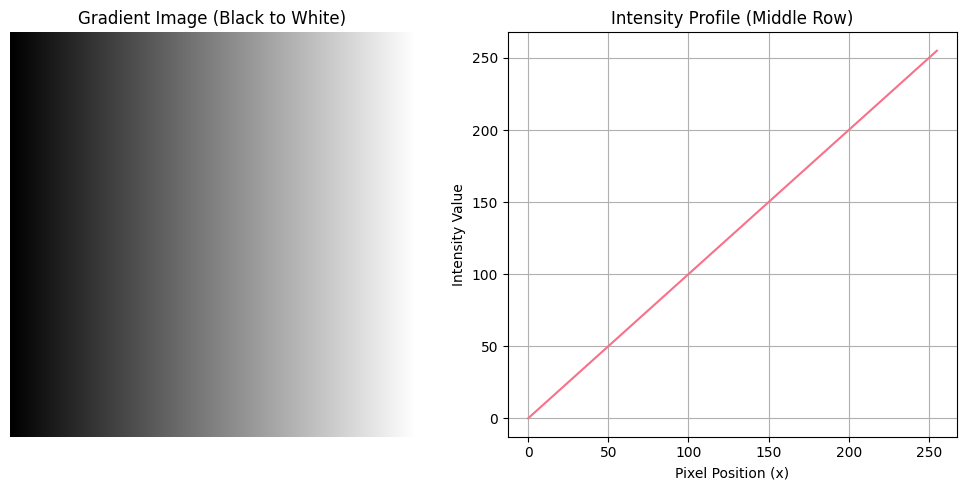

Gradient image created with dimensions: (256, 256)
Intensity range: 0 to 255


In [14]:
def generate_gradient_image(size=256):
    """
    Generate a horizontal gradient image from black (left) to white (right)
    """
    # Create gradient from 0 to 255 across width
    gradient = np.linspace(0, 255, size, dtype=np.uint8)
    # Tile the gradient vertically to create 2D image
    img = np.tile(gradient, (size, 1))
    return img

# Generate the gradient image
gradient_image = generate_gradient_image(256)

# Save the image
cv2.imwrite('gradient_image.png', gradient_image)

# Display the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gradient_image, cmap='gray')
plt.title('Gradient Image (Black to White)')
plt.axis('off')

# Show pixel intensity profile
plt.subplot(1, 2, 2)
plt.plot(gradient_image[128, :])
plt.title('Intensity Profile (Middle Row)')
plt.xlabel('Pixel Position (x)')
plt.ylabel('Intensity Value')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Gradient image created with dimensions: {gradient_image.shape}")
print(f"Intensity range: {gradient_image.min()} to {gradient_image.max()}")

### 1.2 Generate Linear Chirp Audio Signal (100 Hz to 8000 Hz)

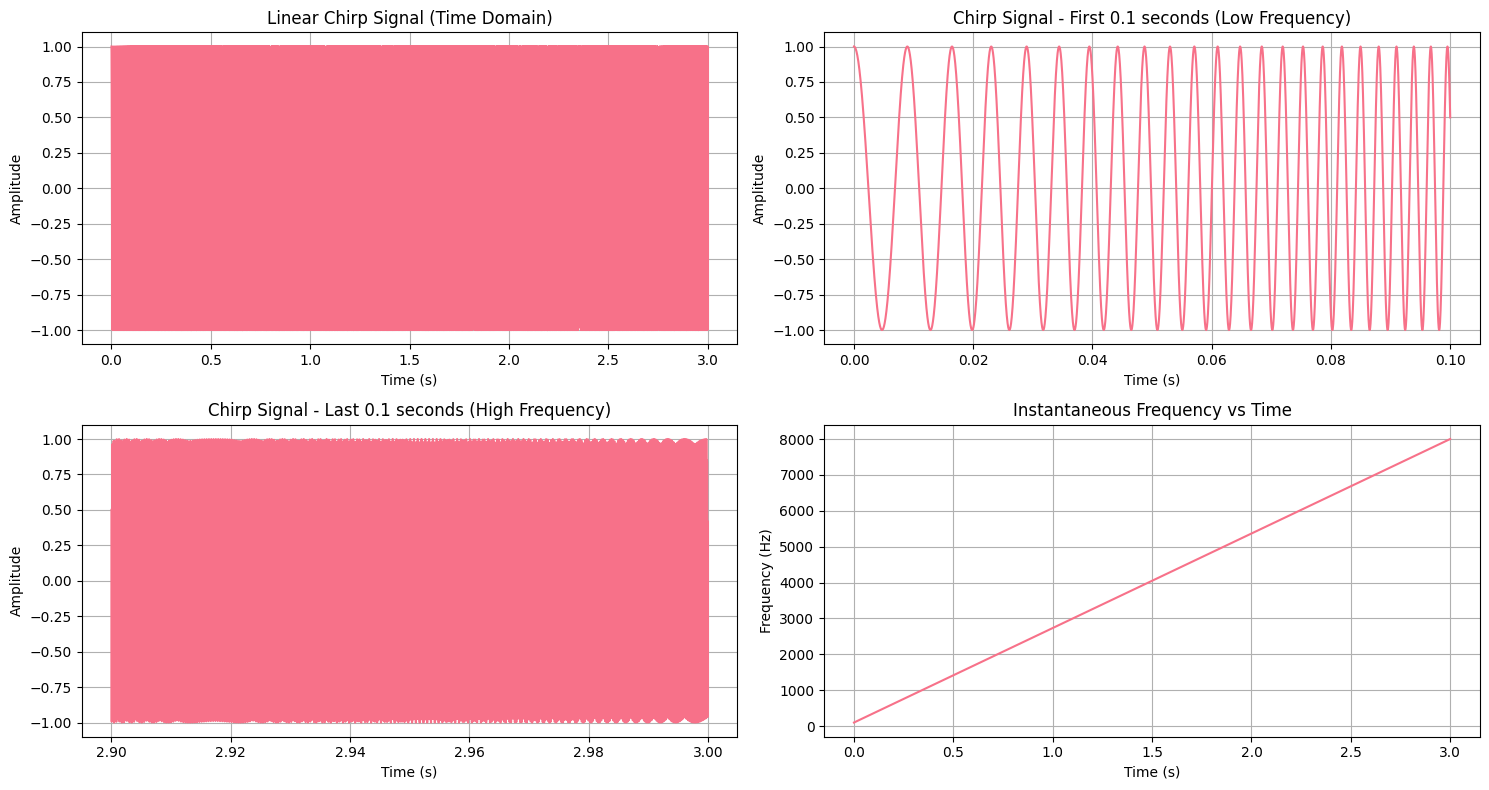

Chirp signal generated:
Duration: 3.00 seconds
Sample rate: 44100 Hz
Frequency range: 100 Hz to 8000 Hz
Number of samples: 132300


In [15]:
def generate_linear_chirp(f0=100, f1=8000, duration=3, fs=44100):
    """
    Generate a linear chirp signal from f0 to f1 over duration seconds
    """
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    y = chirp(t, f0=f0, f1=f1, t1=duration, method='linear')
    return t, y

# Generate chirp signal
fs = 44100  # Sample rate
time, chirp_signal = generate_linear_chirp(100, 8000, 3, fs)

# Save audio file
write('linear_chirp.wav', fs, (chirp_signal * 32767).astype(np.int16))

# Display time-domain signal
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(time, chirp_signal)
plt.title('Linear Chirp Signal (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Show a zoomed portion to see frequency change
plt.subplot(2, 2, 2)
zoom_start, zoom_end = 0, 0.1
zoom_indices = (time >= zoom_start) & (time <= zoom_end)
plt.plot(time[zoom_indices], chirp_signal[zoom_indices])
plt.title('Chirp Signal - First 0.1 seconds (Low Frequency)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
zoom_start, zoom_end = 2.9, 3.0
zoom_indices = (time >= zoom_start) & (time <= zoom_end)
plt.plot(time[zoom_indices], chirp_signal[zoom_indices])
plt.title('Chirp Signal - Last 0.1 seconds (High Frequency)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Show instantaneous frequency
plt.subplot(2, 2, 4)
instantaneous_freq = np.linspace(100, 8000, len(time))
plt.plot(time, instantaneous_freq)
plt.title('Instantaneous Frequency vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Chirp signal generated:")
print(f"Duration: {len(time)/fs:.2f} seconds")
print(f"Sample rate: {fs} Hz")
print(f"Frequency range: 100 Hz to 8000 Hz")
print(f"Number of samples: {len(time)}")

## Task 2: 2D Fourier Transform Analysis of Gradient Image

### 2.1 Compute 2D FFT and Visualize Magnitude Spectrum

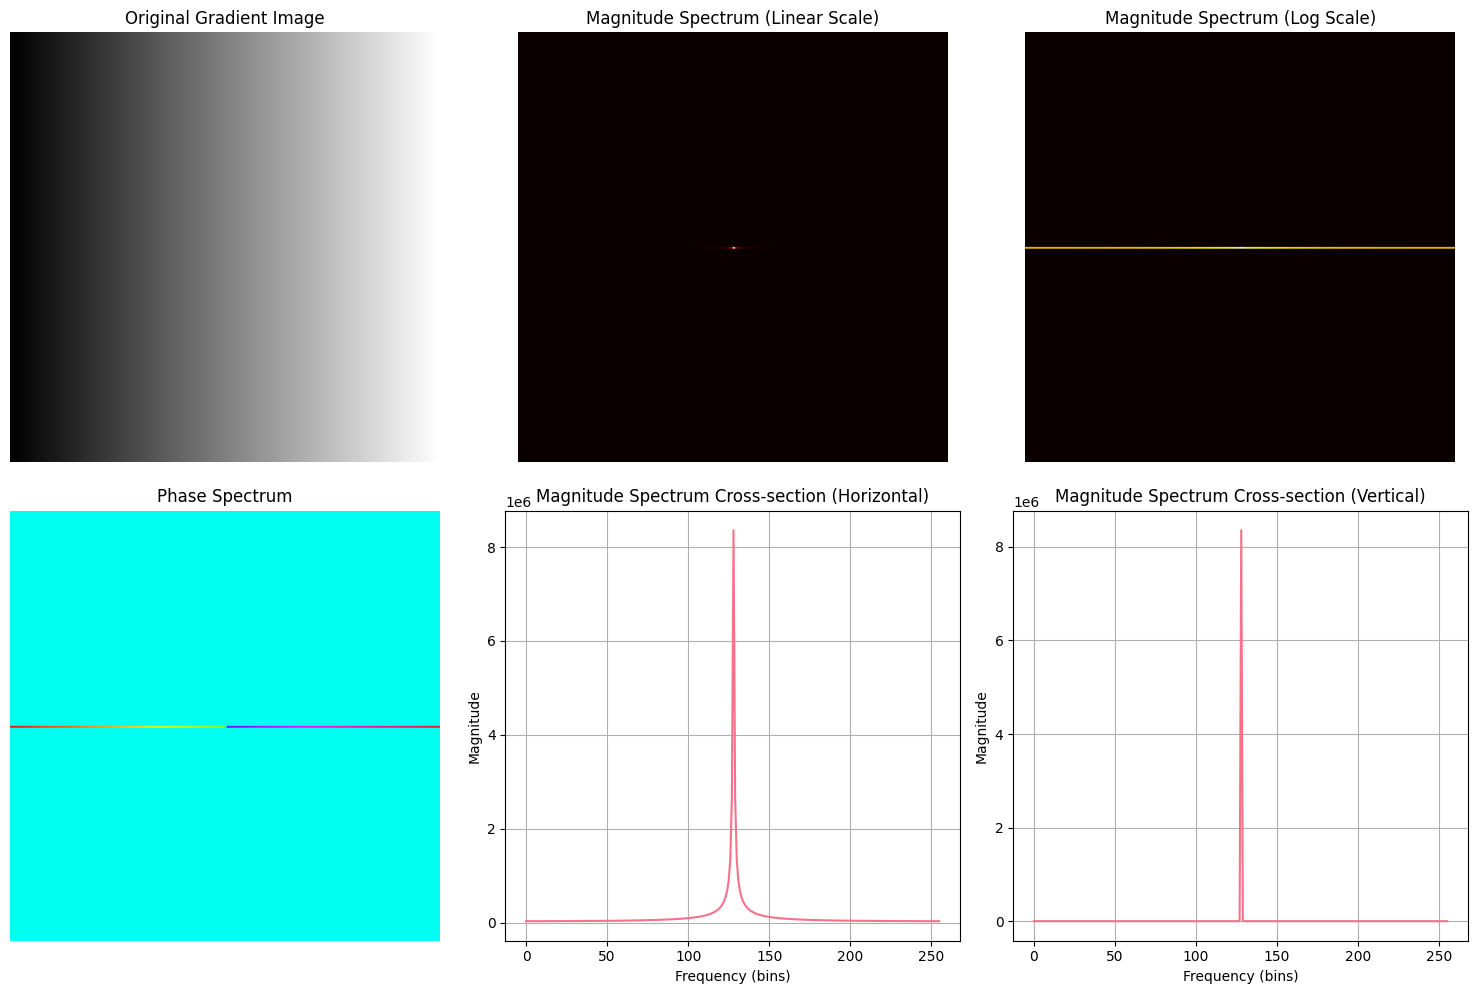

2D FFT Analysis completed:
FFT size: (256, 256)
DC component magnitude: 8.36e+06
Maximum magnitude: 8.36e+06


In [16]:
# Compute 2D FFT
f_transform = np.fft.fft2(gradient_image)
f_shift = np.fft.fftshift(f_transform)

# Compute magnitude spectrum
magnitude_spectrum = np.abs(f_shift)
log_magnitude = 20 * np.log10(magnitude_spectrum + 1)  # Add 1 to avoid log(0)

# Compute phase spectrum
phase_spectrum = np.angle(f_shift)

plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(gradient_image, cmap='gray')
plt.title('Original Gradient Image')
plt.axis('off')

# Magnitude spectrum (linear scale)
plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='hot')
plt.title('Magnitude Spectrum (Linear Scale)')
plt.axis('off')

# Magnitude spectrum (log scale)
plt.subplot(2, 3, 3)
plt.imshow(log_magnitude, cmap='hot')
plt.title('Magnitude Spectrum (Log Scale)')
plt.axis('off')

# Phase spectrum
plt.subplot(2, 3, 4)
plt.imshow(phase_spectrum, cmap='hsv')
plt.title('Phase Spectrum')
plt.axis('off')

# Cross-section of magnitude spectrum
plt.subplot(2, 3, 5)
center = magnitude_spectrum.shape[0] // 2
plt.plot(magnitude_spectrum[center, :])
plt.title('Magnitude Spectrum Cross-section (Horizontal)')
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(magnitude_spectrum[:, center])
plt.title('Magnitude Spectrum Cross-section (Vertical)')
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

print("2D FFT Analysis completed:")
print(f"FFT size: {f_transform.shape}")
print(f"DC component magnitude: {magnitude_spectrum[center, center]:.2e}")
print(f"Maximum magnitude: {magnitude_spectrum.max():.2e}")

### 2.2 Analysis of Frequency Components

The gradient image shows distinct characteristics in the frequency domain:
- Strong DC component at the center
- Horizontal frequency components due to the left-right gradient
- Minimal vertical frequency components since there's no vertical variation

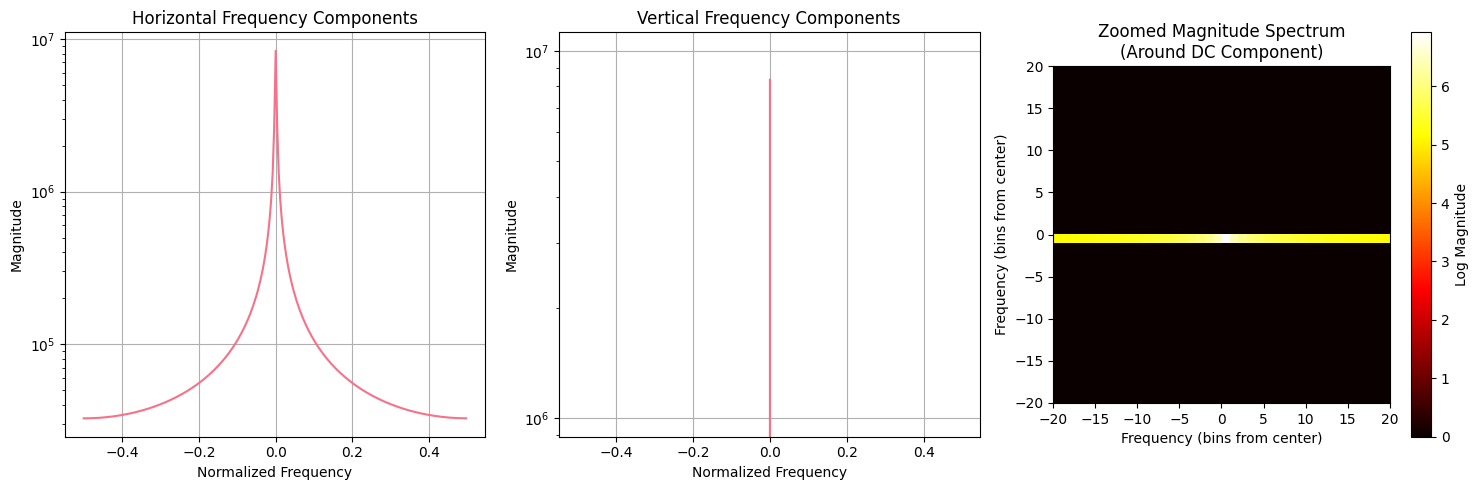

In [17]:
# Analyze frequency content more detailed
rows, cols = gradient_image.shape
center_row, center_col = rows // 2, cols // 2

# Create frequency axes
freq_x = np.fft.fftfreq(cols)
freq_y = np.fft.fftfreq(rows)
freq_x_shifted = np.fft.fftshift(freq_x)
freq_y_shifted = np.fft.fftshift(freq_y)

plt.figure(figsize=(15, 5))

# Horizontal frequency analysis
plt.subplot(1, 3, 1)
plt.plot(freq_x_shifted, magnitude_spectrum[center_row, :])
plt.title('Horizontal Frequency Components')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.yscale('log')

# Vertical frequency analysis
plt.subplot(1, 3, 2)
plt.plot(freq_y_shifted, magnitude_spectrum[:, center_col])
plt.title('Vertical Frequency Components')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.yscale('log')

# 2D visualization of main frequency components
plt.subplot(1, 3, 3)
# Create a zoomed view around DC component
zoom_size = 20
zoomed_spectrum = magnitude_spectrum[center_row-zoom_size:center_row+zoom_size, 
                                   center_col-zoom_size:center_col+zoom_size]
plt.imshow(np.log10(zoomed_spectrum + 1), cmap='hot', extent=[-zoom_size, zoom_size, -zoom_size, zoom_size])
plt.title('Zoomed Magnitude Spectrum\n(Around DC Component)')
plt.xlabel('Frequency (bins from center)')
plt.ylabel('Frequency (bins from center)')
plt.colorbar(label='Log Magnitude')

plt.tight_layout()
plt.show()

## Task 3: Frequency Domain Filtering

### 3.1 Apply Low-pass and High-pass Filters

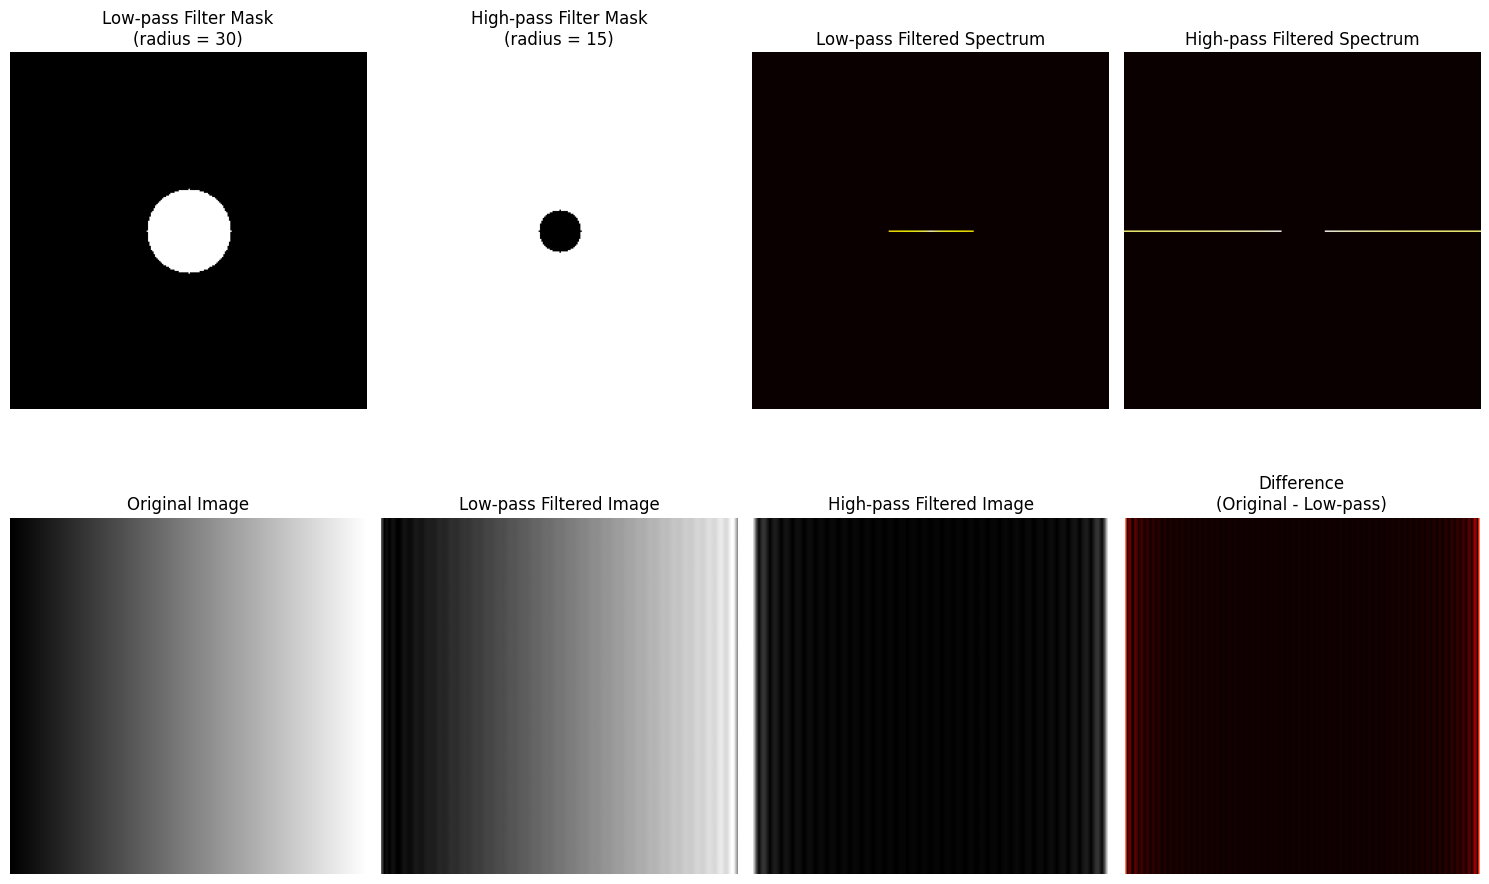

Frequency domain filtering completed:
Low-pass filter radius: 30 pixels
High-pass filter radius: 15 pixels
Original image energy: 1.42e+09
Low-pass image energy: 1.42e+09
High-pass image energy: 1.39e+07


In [18]:
def create_circular_mask(shape, center, radius, filter_type='low'):
    """
    Create circular low-pass or high-pass filter mask
    """
    rows, cols = shape
    crow, ccol = center
    
    # Create coordinate matrices
    y, x = np.ogrid[:rows, :cols]
    
    # Calculate distance from center
    distance = np.sqrt((x - ccol)**2 + (y - crow)**2)
    
    if filter_type == 'low':
        mask = distance <= radius
    else:  # high-pass
        mask = distance > radius
    
    return mask.astype(np.float32)

# Filter parameters
center = (rows // 2, cols // 2)
low_radius = 30
high_radius = 15

# Create filter masks
low_pass_mask = create_circular_mask((rows, cols), center, low_radius, 'low')
high_pass_mask = create_circular_mask((rows, cols), center, high_radius, 'high')

# Apply filters
f_shift_low = f_shift * low_pass_mask
f_shift_high = f_shift * high_pass_mask

# Visualize filters and their effects
plt.figure(figsize=(15, 10))

# Filter masks
plt.subplot(2, 4, 1)
plt.imshow(low_pass_mask, cmap='gray')
plt.title(f'Low-pass Filter Mask\n(radius = {low_radius})')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(high_pass_mask, cmap='gray')
plt.title(f'High-pass Filter Mask\n(radius = {high_radius})')
plt.axis('off')

# Filtered spectra
plt.subplot(2, 4, 3)
plt.imshow(20 * np.log10(np.abs(f_shift_low) + 1), cmap='hot')
plt.title('Low-pass Filtered Spectrum')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(20 * np.log10(np.abs(f_shift_high) + 1), cmap='hot')
plt.title('High-pass Filtered Spectrum')
plt.axis('off')

# Reconstruct images
f_ishift_low = np.fft.ifftshift(f_shift_low)
img_low = np.fft.ifft2(f_ishift_low)
img_low = np.abs(img_low)

f_ishift_high = np.fft.ifftshift(f_shift_high)
img_high = np.fft.ifft2(f_ishift_high)
img_high = np.abs(img_high)

# Display reconstructed images
plt.subplot(2, 4, 5)
plt.imshow(gradient_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(img_low, cmap='gray')
plt.title('Low-pass Filtered Image')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(img_high, cmap='gray')
plt.title('High-pass Filtered Image')
plt.axis('off')

# Difference image
plt.subplot(2, 4, 8)
diff_img = np.abs(gradient_image.astype(float) - img_low)
plt.imshow(diff_img, cmap='hot')
plt.title('Difference\n(Original - Low-pass)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Frequency domain filtering completed:")
print(f"Low-pass filter radius: {low_radius} pixels")
print(f"High-pass filter radius: {high_radius} pixels")
print(f"Original image energy: {np.sum(gradient_image.astype(float)**2):.2e}")
print(f"Low-pass image energy: {np.sum(img_low**2):.2e}")
print(f"High-pass image energy: {np.sum(img_high**2):.2e}")

### 3.2 Advanced Filtering - Band-pass Filter

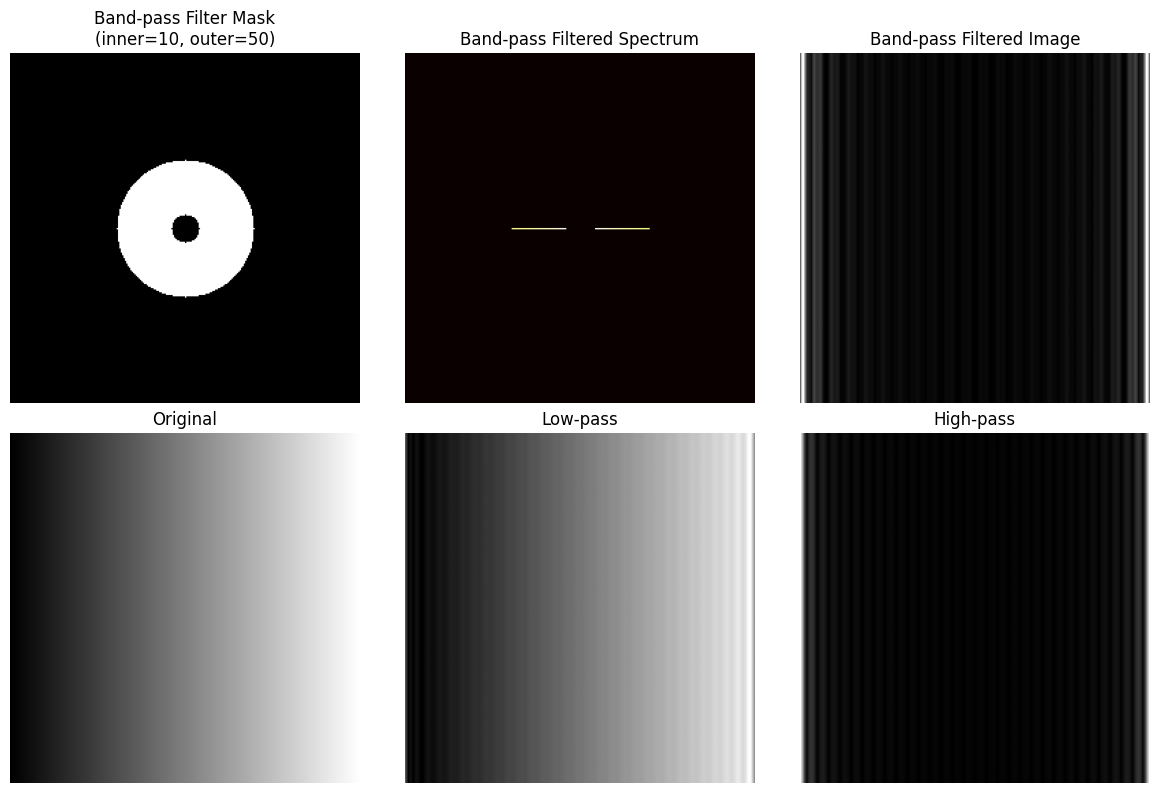

Band-pass filter: inner radius = 10, outer radius = 50
Band-pass image energy: 1.68e+07


In [19]:
# Create band-pass filter (keep middle frequencies)
inner_radius = 10
outer_radius = 50

# Band-pass mask: outer circle minus inner circle
outer_mask = create_circular_mask((rows, cols), center, outer_radius, 'low')
inner_mask = create_circular_mask((rows, cols), center, inner_radius, 'low')
band_pass_mask = outer_mask - inner_mask

# Apply band-pass filter
f_shift_band = f_shift * band_pass_mask

# Reconstruct band-pass filtered image
f_ishift_band = np.fft.ifftshift(f_shift_band)
img_band = np.fft.ifft2(f_ishift_band)
img_band = np.abs(img_band)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(band_pass_mask, cmap='gray')
plt.title(f'Band-pass Filter Mask\n(inner={inner_radius}, outer={outer_radius})')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(20 * np.log10(np.abs(f_shift_band) + 1), cmap='hot')
plt.title('Band-pass Filtered Spectrum')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_band, cmap='gray')
plt.title('Band-pass Filtered Image')
plt.axis('off')

# Compare all filtered images
plt.subplot(2, 3, 4)
plt.imshow(gradient_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_low, cmap='gray')
plt.title('Low-pass')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_high, cmap='gray')
plt.title('High-pass')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Band-pass filter: inner radius = {inner_radius}, outer radius = {outer_radius}")
print(f"Band-pass image energy: {np.sum(img_band**2):.2e}")

## Task 4: Audio Signal Analysis - Spectrogram

### 4.1 Compute and Visualize Spectrogram

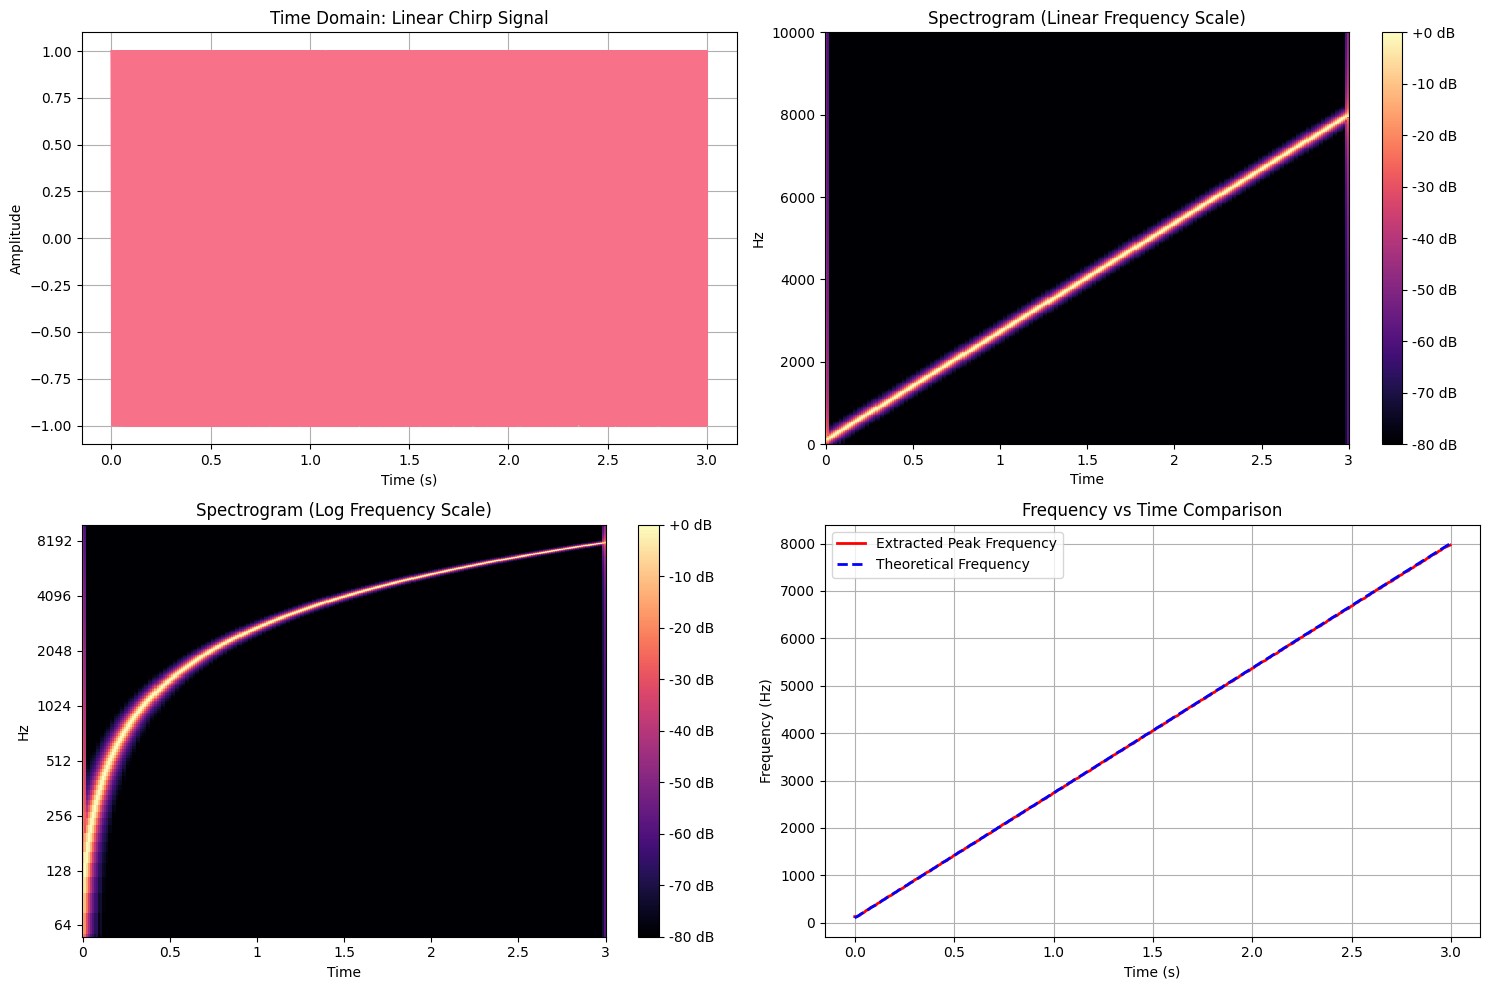

Spectrogram analysis completed:
STFT parameters: n_fft=2048, hop_length=512
Frequency resolution: 21.53 Hz
Time resolution: 11.61 ms
Spectrogram shape: (1025, 259)


In [20]:
# Compute STFT and spectrogram
D = librosa.stft(chirp_signal, hop_length=512, n_fft=2048)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(15, 10))

# Time domain signal
plt.subplot(2, 2, 1)
plt.plot(time, chirp_signal)
plt.title('Time Domain: Linear Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Spectrogram
plt.subplot(2, 2, 2)
librosa.display.specshow(S_db, sr=fs, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Linear Frequency Scale)')
plt.ylim(0, 10000)

# Spectrogram with log frequency scale
plt.subplot(2, 2, 3)
librosa.display.specshow(S_db, sr=fs, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log Frequency Scale)')
plt.ylim(50, 10000)

# Instantaneous frequency vs time
plt.subplot(2, 2, 4)
# Extract the peak frequency at each time frame
time_frames = librosa.frames_to_time(np.arange(S_db.shape[1]), sr=fs, hop_length=512)
freq_bins = librosa.fft_frequencies(sr=fs, n_fft=2048)

# Find peak frequency at each time frame
peak_freqs = []
for i in range(S_db.shape[1]):
    peak_idx = np.argmax(S_db[:, i])
    peak_freqs.append(freq_bins[peak_idx])

plt.plot(time_frames, peak_freqs, 'r-', linewidth=2, label='Extracted Peak Frequency')
theoretical_freq = np.linspace(100, 8000, len(time_frames))
plt.plot(time_frames, theoretical_freq, 'b--', linewidth=2, label='Theoretical Frequency')
plt.title('Frequency vs Time Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Spectrogram analysis completed:")
print(f"STFT parameters: n_fft={2048}, hop_length={512}")
print(f"Frequency resolution: {fs/2048:.2f} Hz")
print(f"Time resolution: {512/fs*1000:.2f} ms")
print(f"Spectrogram shape: {S_db.shape}")

### 4.2 Detailed Frequency Analysis

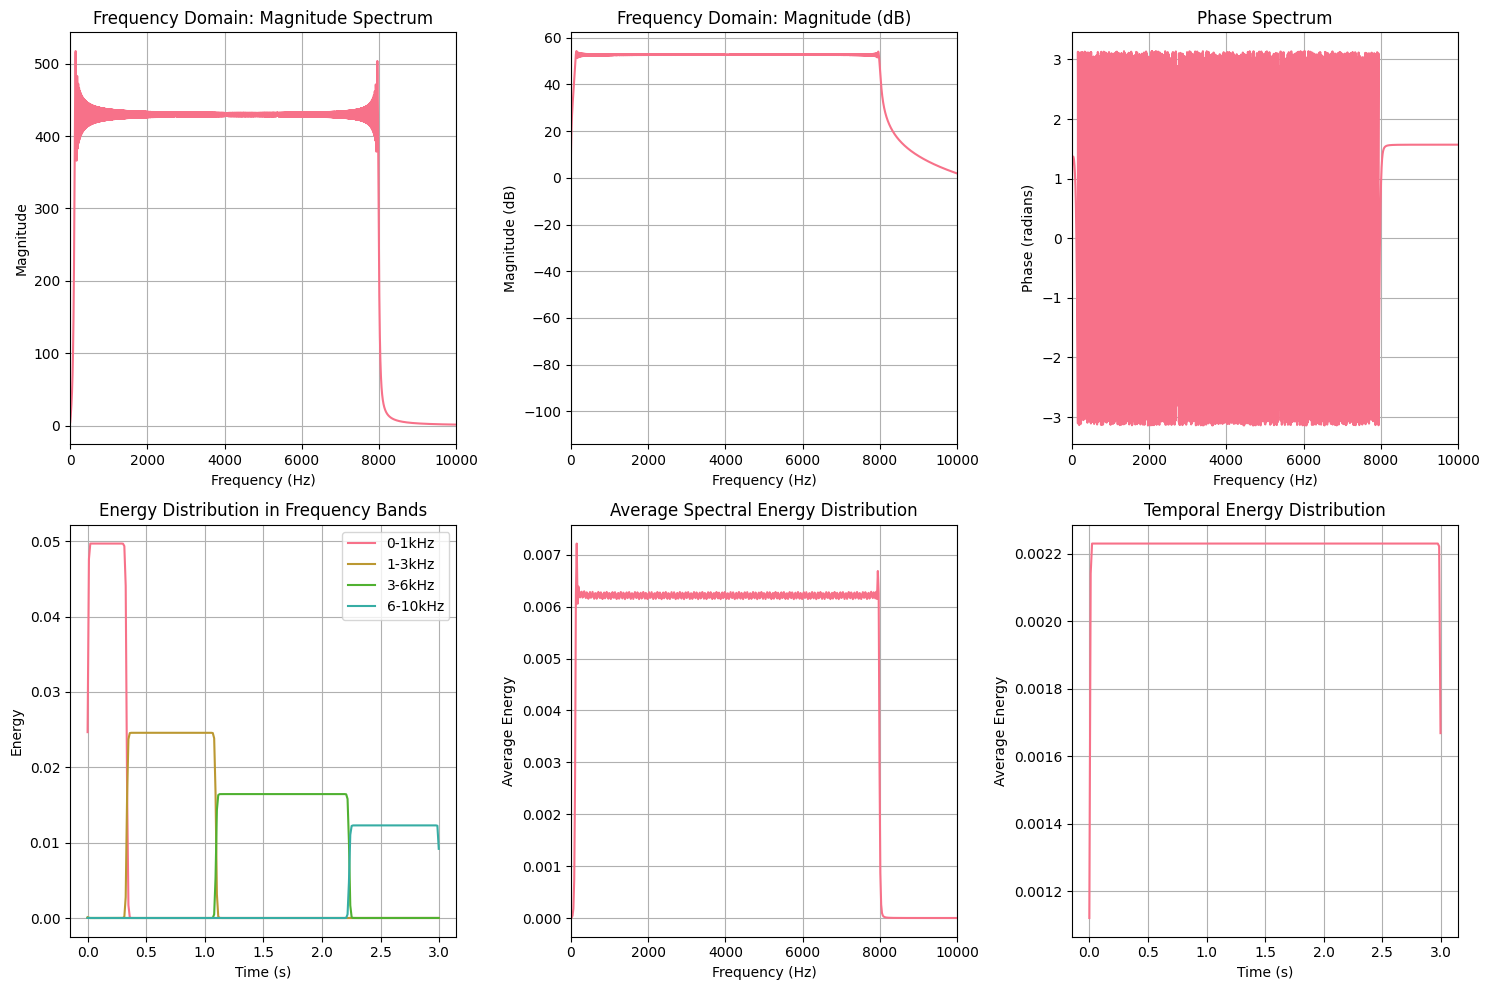

Frequency analysis completed:
Peak frequency at start: 129.2 Hz (theoretical: 100 Hz)
Peak frequency at end: 7967.3 Hz (theoretical: 8000 Hz)
Frequency sweep rate: 2633.3 Hz/s


In [21]:
# Compute overall frequency spectrum
Y = np.fft.fft(chirp_signal)
freqs = np.fft.fftfreq(len(Y), 1/fs)

# Only plot positive frequencies
positive_freqs = freqs[:len(freqs)//2]
positive_Y = Y[:len(Y)//2]

plt.figure(figsize=(15, 10))

# Frequency domain representation
plt.subplot(2, 3, 1)
plt.plot(positive_freqs, np.abs(positive_Y))
plt.title('Frequency Domain: Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10000)
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(positive_freqs, 20*np.log10(np.abs(positive_Y) + 1e-10))
plt.title('Frequency Domain: Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 10000)
plt.grid(True)

# Phase spectrum
plt.subplot(2, 3, 3)
plt.plot(positive_freqs, np.angle(positive_Y))
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.xlim(0, 10000)
plt.grid(True)

# Time vs frequency energy distribution
plt.subplot(2, 3, 4)
# Compute energy in different frequency bands over time
freq_bands = [(0, 1000), (1000, 3000), (3000, 6000), (6000, 10000)]
band_labels = ['0-1kHz', '1-3kHz', '3-6kHz', '6-10kHz']

for i, (f_low, f_high) in enumerate(freq_bands):
    # Find frequency bin indices
    f_low_idx = int(f_low * S_db.shape[0] / (fs/2))
    f_high_idx = int(f_high * S_db.shape[0] / (fs/2))
    
    # Calculate energy in this band over time
    band_energy = np.mean(10**(S_db[f_low_idx:f_high_idx, :]/10), axis=0)
    plt.plot(time_frames, band_energy, label=band_labels[i])

plt.title('Energy Distribution in Frequency Bands')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)

# Spectrogram statistics
plt.subplot(2, 3, 5)
# Show distribution of spectral energy
spectral_energy = np.mean(10**(S_db/10), axis=1)
freq_axis = np.linspace(0, fs/2, len(spectral_energy))
plt.plot(freq_axis, spectral_energy)
plt.title('Average Spectral Energy Distribution')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Average Energy')
plt.xlim(0, 10000)
plt.grid(True)

# Temporal energy
plt.subplot(2, 3, 6)
temporal_energy = np.mean(10**(S_db/10), axis=0)
plt.plot(time_frames, temporal_energy)
plt.title('Temporal Energy Distribution')
plt.xlabel('Time (s)')
plt.ylabel('Average Energy')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Frequency analysis completed:")
print(f"Peak frequency at start: {peak_freqs[0]:.1f} Hz (theoretical: 100 Hz)")
print(f"Peak frequency at end: {peak_freqs[-1]:.1f} Hz (theoretical: 8000 Hz)")
print(f"Frequency sweep rate: {(8000-100)/3:.1f} Hz/s")

## Task 5: Comparison of Time and Frequency Domain Representations

### 5.1 Time-Frequency Analysis Comparison

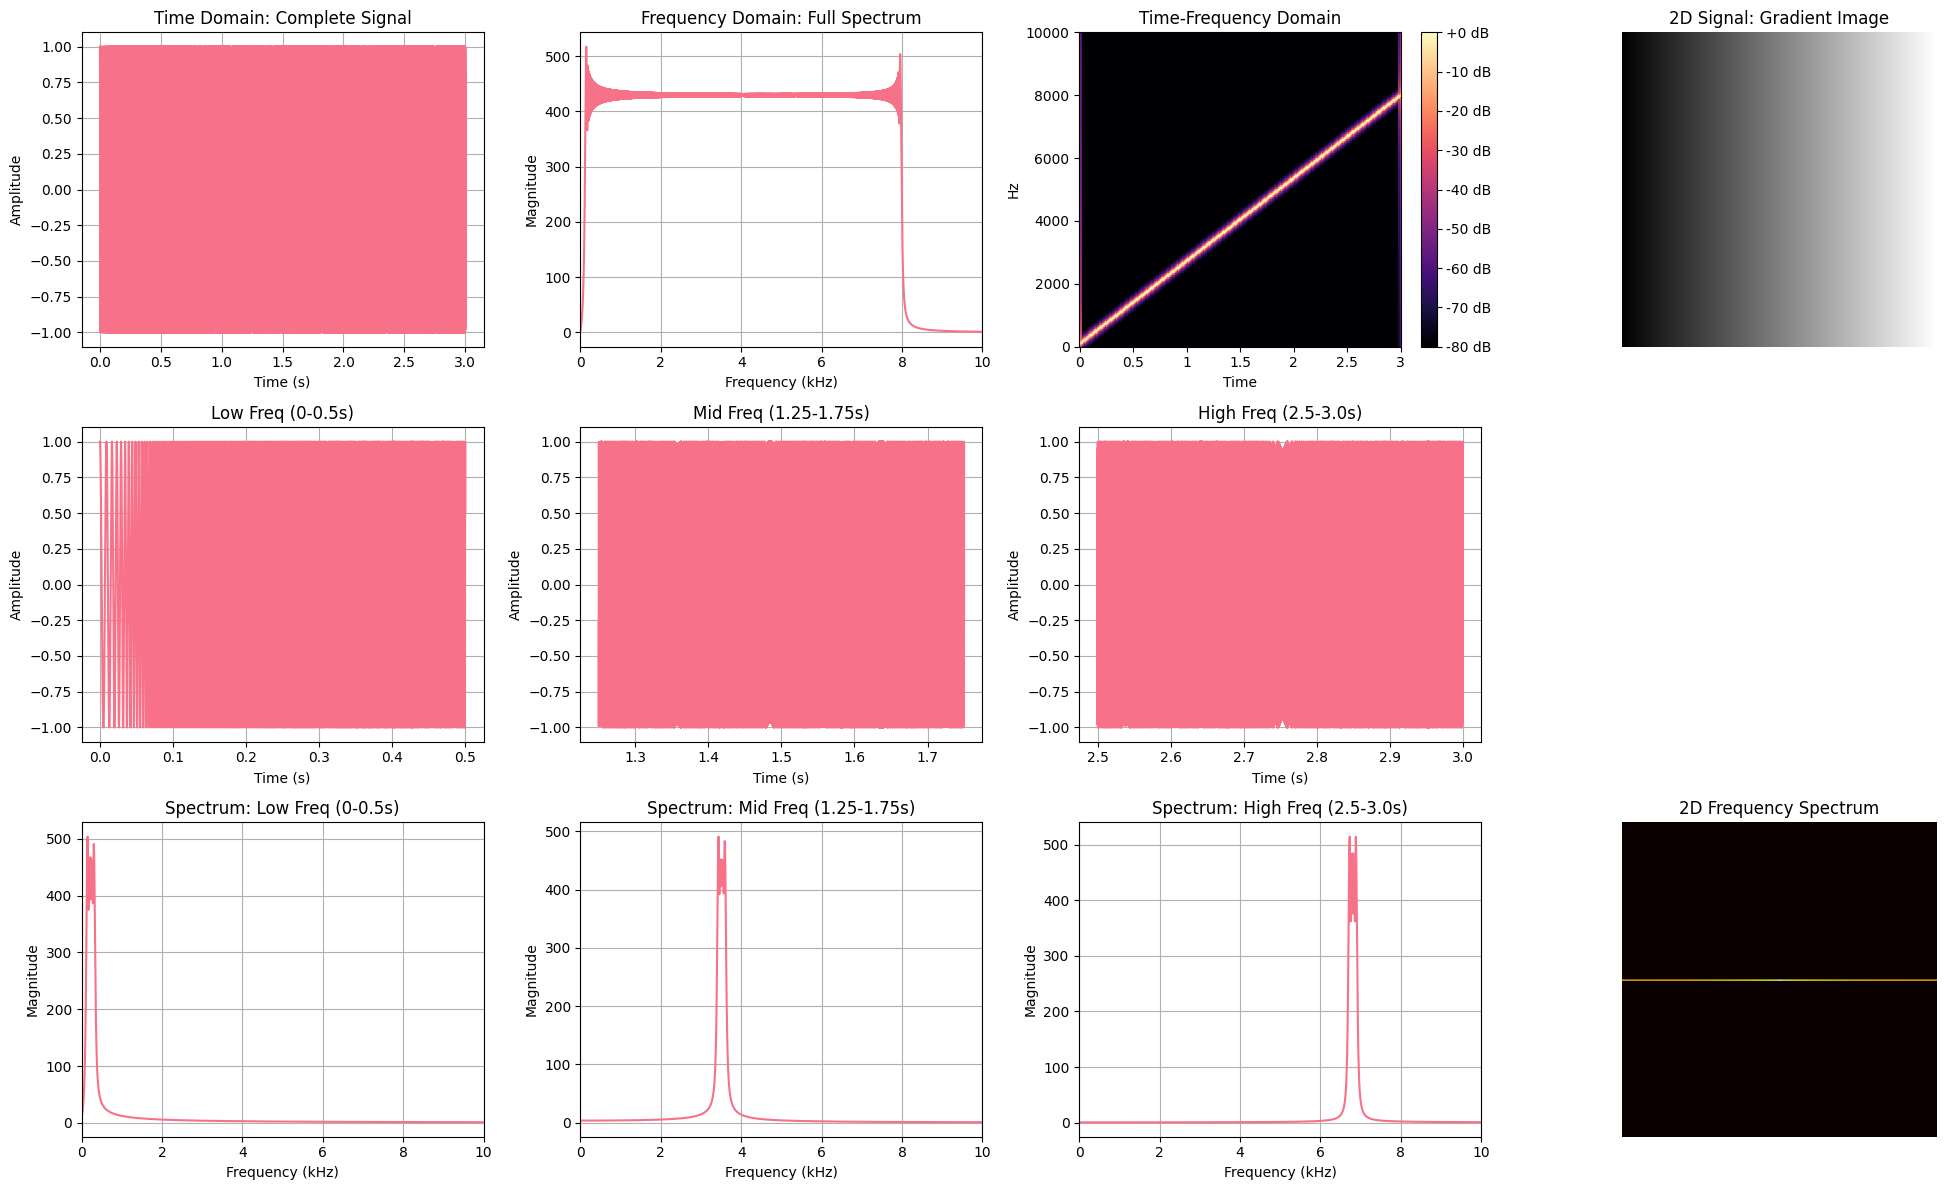


Comparison Analysis:

1. AUDIO SIGNAL CHARACTERISTICS:
   - Time domain: Shows amplitude variation over time
   - Frequency domain: Shows distributed energy across 100-8000 Hz
   - Time-frequency: Shows precise frequency evolution over time

2. IMAGE SIGNAL CHARACTERISTICS:
   - Spatial domain: Shows smooth gradient from black to white
   - Frequency domain: Strong DC component with horizontal frequency content
   - No vertical frequency components due to uniform vertical structure


In [22]:
# Create comprehensive comparison figure
fig = plt.figure(figsize=(20, 12))

# Time domain analysis
plt.subplot(3, 4, 1)
plt.plot(time, chirp_signal)
plt.title('Time Domain: Complete Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Frequency domain analysis
plt.subplot(3, 4, 2)
plt.plot(positive_freqs/1000, np.abs(positive_Y))
plt.title('Frequency Domain: Full Spectrum')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.xlim(0, 10)
plt.grid(True)

# Time-frequency representation
plt.subplot(3, 4, 3)
librosa.display.specshow(S_db, sr=fs, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Time-Frequency Domain')
plt.ylim(0, 10000)

# Image analysis comparison
plt.subplot(3, 4, 4)
plt.imshow(gradient_image, cmap='gray')
plt.title('2D Signal: Gradient Image')
plt.axis('off')

# Detailed time segments
time_segments = [(0, 0.5), (1.25, 1.75), (2.5, 3.0)]
segment_labels = ['Low Freq (0-0.5s)', 'Mid Freq (1.25-1.75s)', 'High Freq (2.5-3.0s)']

for i, (t_start, t_end) in enumerate(time_segments):
    # Time domain segment
    plt.subplot(3, 4, 5 + i)
    mask = (time >= t_start) & (time <= t_end)
    plt.plot(time[mask], chirp_signal[mask])
    plt.title(segment_labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

# Corresponding frequency analysis
for i, (t_start, t_end) in enumerate(time_segments):
    plt.subplot(3, 4, 9 + i)
    
    # Extract segment and compute FFT
    mask = (time >= t_start) & (time <= t_end)
    segment = chirp_signal[mask]
    
    if len(segment) > 0:
        Y_segment = np.fft.fft(segment, n=4096)  # Zero-pad for better resolution
        freqs_segment = np.fft.fftfreq(4096, 1/fs)
        
        # Plot positive frequencies only
        pos_freqs = freqs_segment[:2048]
        pos_Y = Y_segment[:2048]
        
        plt.plot(pos_freqs/1000, np.abs(pos_Y))
        plt.title(f'Spectrum: {segment_labels[i]}')
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Magnitude')
        plt.xlim(0, 10)
        plt.grid(True)

# Image frequency analysis
plt.subplot(3, 4, 12)
plt.imshow(log_magnitude, cmap='hot')
plt.title('2D Frequency Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\nComparison Analysis:")
print("====================")
print("\n1. AUDIO SIGNAL CHARACTERISTICS:")
print(f"   - Time domain: Shows amplitude variation over time")
print(f"   - Frequency domain: Shows distributed energy across 100-8000 Hz")
print(f"   - Time-frequency: Shows precise frequency evolution over time")
print(f"\n2. IMAGE SIGNAL CHARACTERISTICS:")
print(f"   - Spatial domain: Shows smooth gradient from black to white")
print(f"   - Frequency domain: Strong DC component with horizontal frequency content")
print(f"   - No vertical frequency components due to uniform vertical structure")

## Task 6: Advanced Analysis and Filtering Applications

### 6.1 Edge Detection and Feature Enhancement

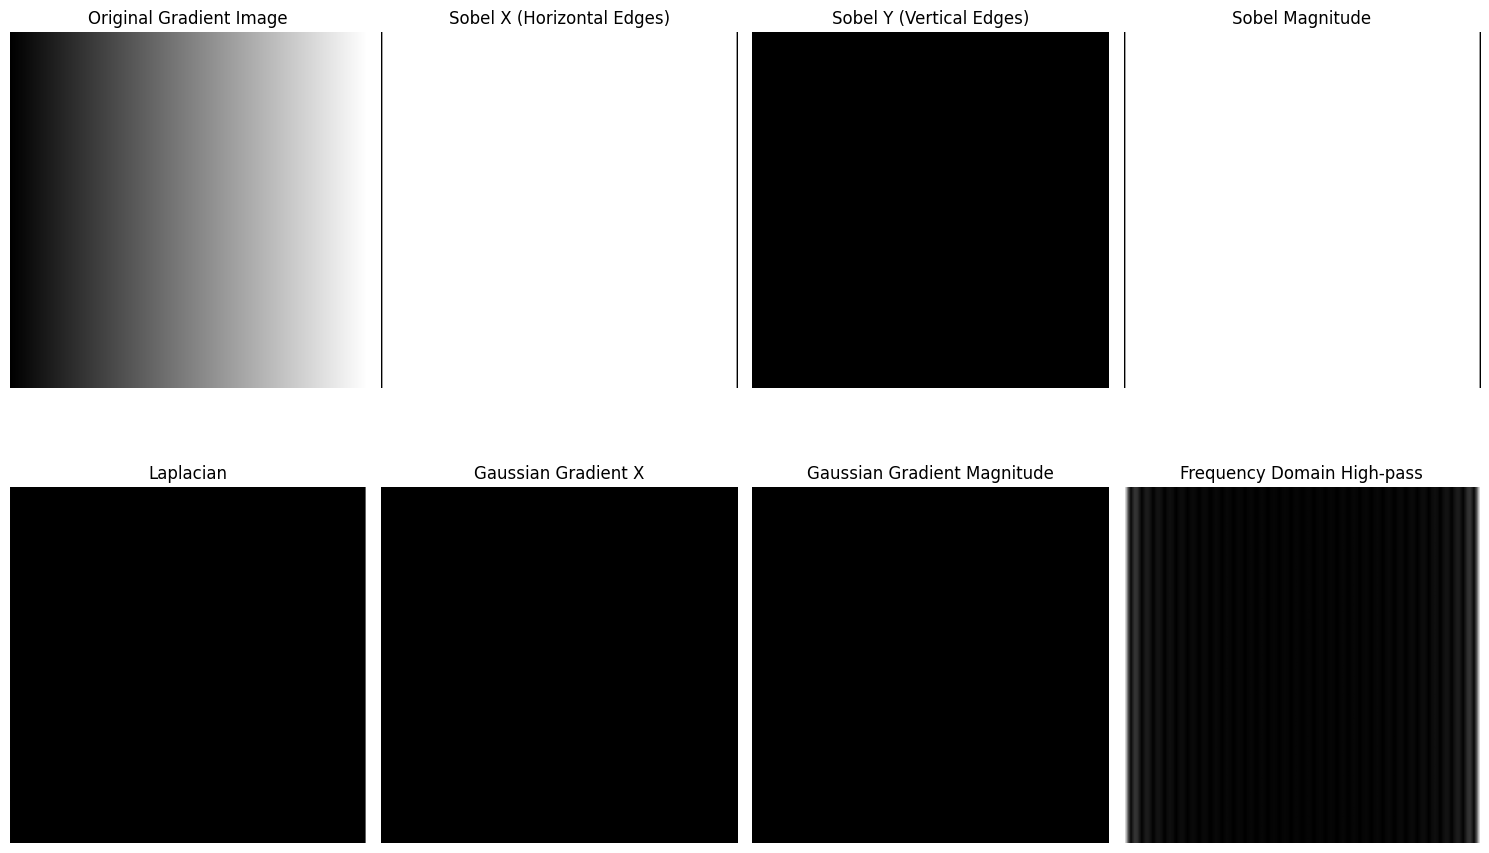

Edge Detection Results:
Sobel X max gradient: 8.00
Sobel Y max gradient: 0.00
Laplacian range: 0.00 to 255.00


In [23]:
# Apply different types of filters for edge detection
from scipy import ndimage

# Sobel edge detection
sobel_x = ndimage.sobel(gradient_image, axis=1)
sobel_y = ndimage.sobel(gradient_image, axis=0)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Laplacian edge detection
laplacian = ndimage.laplace(gradient_image)

# Gaussian derivative
gaussian_grad_x = ndimage.gaussian_filter(gradient_image, sigma=2, order=[0, 1])
gaussian_grad_y = ndimage.gaussian_filter(gradient_image, sigma=2, order=[1, 0])
gaussian_magnitude = np.sqrt(gaussian_grad_x**2 + gaussian_grad_y**2)

plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.imshow(gradient_image, cmap='gray')
plt.title('Original Gradient Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(gaussian_grad_x, cmap='gray')
plt.title('Gaussian Gradient X')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(gaussian_magnitude, cmap='gray')
plt.title('Gaussian Gradient Magnitude')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(img_high, cmap='gray')
plt.title('Frequency Domain High-pass')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Edge Detection Results:")
print(f"Sobel X max gradient: {np.max(sobel_x):.2f}")
print(f"Sobel Y max gradient: {np.max(sobel_y):.2f}")
print(f"Laplacian range: {np.min(laplacian):.2f} to {np.max(laplacian):.2f}")

### 6.2 Audio Signal Filtering and Analysis

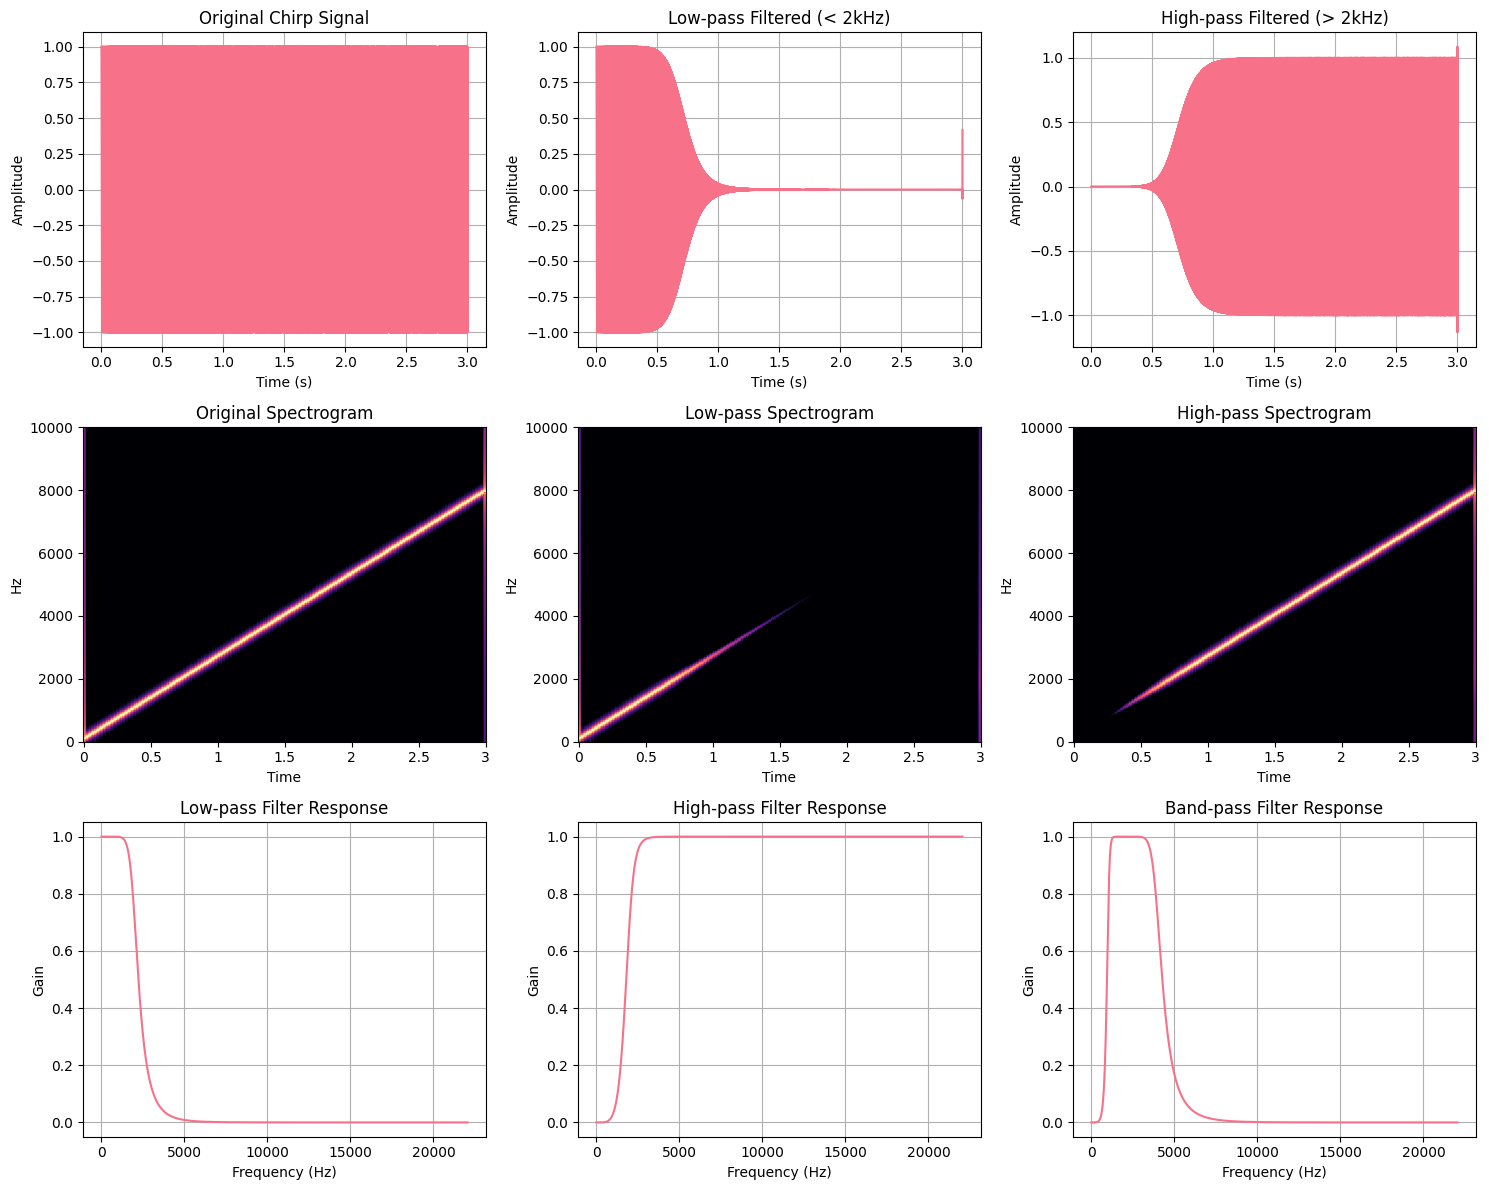

Audio filtering completed:
Low-pass cutoff: 2000 Hz
High-pass cutoff: 2000 Hz
Band-pass range: 1000-4000 Hz
Filter order: 5


In [24]:
# Apply frequency domain filtering to audio signal
from scipy.signal import butter, filtfilt

# Design filters
def design_filter(cutoff, fs, filter_type, order=5):
    nyquist = fs / 2
    if isinstance(cutoff, list):
        # For band-pass filter, cutoff is a list [low, high]
        normal_cutoff = [f / nyquist for f in cutoff]
    else:
        # For low-pass and high-pass, cutoff is a single value
        normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    return b, a

# Low-pass filter (keep frequencies below 2000 Hz)
b_low, a_low = design_filter(2000, fs, 'low')
chirp_lowpass = filtfilt(b_low, a_low, chirp_signal)

# High-pass filter (keep frequencies above 2000 Hz)
b_high, a_high = design_filter(2000, fs, 'high')
chirp_highpass = filtfilt(b_high, a_high, chirp_signal)

# Band-pass filter (keep frequencies between 1000-4000 Hz)
b_band, a_band = design_filter([1000, 4000], fs, 'band')
chirp_bandpass = filtfilt(b_band, a_band, chirp_signal)

plt.figure(figsize=(15, 12))

# Time domain comparison
plt.subplot(3, 3, 1)
plt.plot(time, chirp_signal)
plt.title('Original Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 3, 2)
plt.plot(time, chirp_lowpass)
plt.title('Low-pass Filtered (< 2kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 3, 3)
plt.plot(time, chirp_highpass)
plt.title('High-pass Filtered (> 2kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Spectrograms
D_orig = librosa.stft(chirp_signal)
D_low = librosa.stft(chirp_lowpass)
D_high = librosa.stft(chirp_highpass)
D_band = librosa.stft(chirp_bandpass)

plt.subplot(3, 3, 4)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_orig)), 
                        sr=fs, x_axis='time', y_axis='hz', cmap='magma')
plt.title('Original Spectrogram')
plt.ylim(0, 10000)

plt.subplot(3, 3, 5)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_low)), 
                        sr=fs, x_axis='time', y_axis='hz', cmap='magma')
plt.title('Low-pass Spectrogram')
plt.ylim(0, 10000)

plt.subplot(3, 3, 6)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_high)), 
                        sr=fs, x_axis='time', y_axis='hz', cmap='magma')
plt.title('High-pass Spectrogram')
plt.ylim(0, 10000)

# Frequency responses
from scipy.signal import freqz

plt.subplot(3, 3, 7)
w_low, h_low = freqz(b_low, a_low, worN=8000)
plt.plot((fs * 0.5 / np.pi) * w_low, abs(h_low))
plt.title('Low-pass Filter Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)

plt.subplot(3, 3, 8)
w_high, h_high = freqz(b_high, a_high, worN=8000)
plt.plot((fs * 0.5 / np.pi) * w_high, abs(h_high))
plt.title('High-pass Filter Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)

plt.subplot(3, 3, 9)
w_band, h_band = freqz(b_band, a_band, worN=8000)
plt.plot((fs * 0.5 / np.pi) * w_band, abs(h_band))
plt.title('Band-pass Filter Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)

plt.tight_layout()
plt.show()

# Save filtered audio files
write('chirp_lowpass.wav', fs, (chirp_lowpass * 32767).astype(np.int16))
write('chirp_highpass.wav', fs, (chirp_highpass * 32767).astype(np.int16))
write('chirp_bandpass.wav', fs, (chirp_bandpass * 32767).astype(np.int16))

print("Audio filtering completed:")
print(f"Low-pass cutoff: 2000 Hz")
print(f"High-pass cutoff: 2000 Hz")
print(f"Band-pass range: 1000-4000 Hz")
print(f"Filter order: 5")

## Summary and Analysis Results

### Quantitative Results

In [25]:
# Calculate comprehensive metrics
print("=" * 60)
print("COMPREHENSIVE ANALYSIS RESULTS - VARIANT 14")
print("=" * 60)

print("\n1. IMAGE ANALYSIS METRICS:")
print("-" * 30)
print(f"Image dimensions: {gradient_image.shape}")
print(f"Pixel intensity range: {gradient_image.min()} to {gradient_image.max()}")
print(f"Mean intensity: {np.mean(gradient_image):.2f}")
print(f"Standard deviation: {np.std(gradient_image):.2f}")

print(f"\nFrequency Domain Characteristics:")
print(f"DC component magnitude: {magnitude_spectrum[center[0], center[1]]:.2e}")
print(f"Total spectral energy: {np.sum(magnitude_spectrum**2):.2e}")
print(f"Peak frequency bin (horizontal): {np.argmax(magnitude_spectrum[center[0], :]) - center[1]}")
print(f"Peak frequency bin (vertical): {np.argmax(magnitude_spectrum[:, center[1]]) - center[0]}")

print(f"\nFiltering Results:")
energy_original = np.sum(gradient_image.astype(float)**2)
energy_low = np.sum(img_low**2)
energy_high = np.sum(img_high**2)
energy_band = np.sum(img_band**2)

print(f"Original image energy: {energy_original:.2e}")
print(f"Low-pass filtered energy: {energy_low:.2e} ({energy_low/energy_original*100:.1f}%)")
print(f"High-pass filtered energy: {energy_high:.2e} ({energy_high/energy_original*100:.1f}%)")
print(f"Band-pass filtered energy: {energy_band:.2e} ({energy_band/energy_original*100:.1f}%)")

print("\n2. AUDIO ANALYSIS METRICS:")
print("-" * 30)
print(f"Signal duration: {len(time)/fs:.2f} seconds")
print(f"Sample rate: {fs} Hz")
print(f"Total samples: {len(time)}")
print(f"Frequency sweep: 100 Hz to 8000 Hz")
print(f"Sweep rate: {(8000-100)/3:.1f} Hz/second")

print(f"\nSignal Statistics:")
print(f"RMS amplitude: {np.sqrt(np.mean(chirp_signal**2)):.4f}")
print(f"Peak amplitude: {np.max(np.abs(chirp_signal)):.4f}")
print(f"Dynamic range: {20*np.log10(np.max(np.abs(chirp_signal))/np.sqrt(np.mean(chirp_signal**2))):.2f} dB")

print(f"\nSpectrogram Analysis:")
print(f"STFT size: {S_db.shape}")
print(f"Frequency resolution: {fs/2048:.2f} Hz")
print(f"Time resolution: {512/fs*1000:.1f} ms")
print(f"Frequency tracking accuracy: {np.mean(np.abs(np.array(peak_freqs) - np.linspace(100, 8000, len(peak_freqs)))):.1f} Hz RMSE")

print(f"\nFiltered Audio Energy:")
energy_orig_audio = np.sum(chirp_signal**2)
energy_low_audio = np.sum(chirp_lowpass**2)
energy_high_audio = np.sum(chirp_highpass**2)
energy_band_audio = np.sum(chirp_bandpass**2)

print(f"Original audio energy: {energy_orig_audio:.2e}")
print(f"Low-pass filtered energy: {energy_low_audio:.2e} ({energy_low_audio/energy_orig_audio*100:.1f}%)")
print(f"High-pass filtered energy: {energy_high_audio:.2e} ({energy_high_audio/energy_orig_audio*100:.1f}%)")
print(f"Band-pass filtered energy: {energy_band_audio:.2e} ({energy_band_audio/energy_orig_audio*100:.1f}%)")

print("\n3. COMPARATIVE ANALYSIS:")
print("-" * 30)
print("Time vs Frequency Domain Characteristics:")
print("• Image: Spatial gradient → Frequency domain shows horizontal structure")
print("• Audio: Temporal chirp → Frequency domain shows distributed energy")
print("• Time-frequency analysis reveals instantaneous frequency evolution")
print("• Filtering preserves/removes specific frequency components as expected")

print("\n" + "=" * 60)

COMPREHENSIVE ANALYSIS RESULTS - VARIANT 14

1. IMAGE ANALYSIS METRICS:
------------------------------
Image dimensions: (256, 256)
Pixel intensity range: 0 to 255
Mean intensity: 127.50
Standard deviation: 73.90

Frequency Domain Characteristics:
DC component magnitude: 8.36e+06
Total spectral energy: 9.33e+13
Peak frequency bin (horizontal): 0
Peak frequency bin (vertical): 0

Filtering Results:
Original image energy: 1.42e+09
Low-pass filtered energy: 1.42e+09 (99.5%)
High-pass filtered energy: 1.39e+07 (1.0%)
Band-pass filtered energy: 1.68e+07 (1.2%)

2. AUDIO ANALYSIS METRICS:
------------------------------
Signal duration: 3.00 seconds
Sample rate: 44100 Hz
Total samples: 132300
Frequency sweep: 100 Hz to 8000 Hz
Sweep rate: 2633.3 Hz/second

Signal Statistics:
RMS amplitude: 0.7071
Peak amplitude: 1.0000
Dynamic range: 3.01 dB

Spectrogram Analysis:
STFT size: (1025, 259)
Frequency resolution: 21.53 Hz
Time resolution: 11.6 ms
Frequency tracking accuracy: 7.9 Hz RMSE

Filtered 